## Homework 1:

1- Build a Keras Model for linear regression (check: https://keras.io/activations/ ). Use Boston Housing Dataset to train and test your model

2- Build a Keras Model for logistic regression. Use diabetes.csv to train and test

Comments:

1- Build the **simplest model** for linear regression with Keras and compare your model performance with `from sklearn.linear_model import LinearRegression`

2- Build the **simplest model** for logistic regression with Keras and compare your model performance with `from sklearn.linear_model import LogisticRegression`

3- **Add more complexity to your models in (1) and (2)** and compare with previous results

## Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [159]:
from tensorflow.nn import softmax, sigmoid

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

### Pt 1: Keras Sequential Model with Boston Housing Dataset

## Load Boston

In [15]:
from sklearn.datasets import load_boston

In [16]:
boston = load_boston()
bos_df = pd.DataFrame(boston.data, columns=boston.feature_names)
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Split up the Boston data

In [17]:
x = boston.data
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

## Scale the data

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Create a Sequential Kerras model 

In [33]:
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

### Train model on training data using model.fit for 12 epochs

In [37]:
# Train the model
history = model.fit(
    x_train_scaled,
    y_train,
    epochs=12,
    shuffle=True,
    verbose=2
)

Epoch 1/12
 - 0s - loss: 18.6241
Epoch 2/12
 - 0s - loss: 17.3152
Epoch 3/12
 - 0s - loss: 16.3311
Epoch 4/12
 - 0s - loss: 15.5704
Epoch 5/12
 - 0s - loss: 14.8984
Epoch 6/12
 - 0s - loss: 14.4199
Epoch 7/12
 - 0s - loss: 13.9767
Epoch 8/12
 - 0s - loss: 13.5282
Epoch 9/12
 - 0s - loss: 13.1412
Epoch 10/12
 - 0s - loss: 12.6999
Epoch 11/12
 - 0s - loss: 12.5985
Epoch 12/12
 - 0s - loss: 12.1335


### Determine loss function, optimizer and metrics for the model

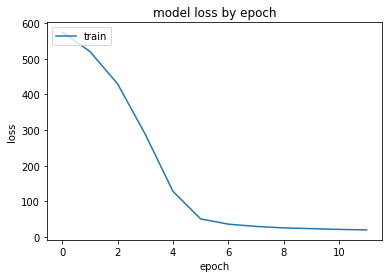

In [35]:
plt.plot(history.history['loss'])
plt.title('model loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [36]:
y_pred = model.predict(x_test_scaled)
mean_squared_error(y_test, y_pred)

24.358157142795108

## Create a linear regression model

In [290]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mean_squared_error(y_test, y_pred)

28.53045876597462

#### Compare results of Sequential model to linear regression model:
- The sequential model works better when it has more than 12 epochs

## Pt 2: Keras Sequential Model with Diabetes Dataset

In [136]:
diabetes_df = pd.read_csv('/datasets/diabetes.csv')

In [75]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [242]:
x = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df['Outcome']
x_scale = StandardScaler(x)

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 5)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


## Create a Sequential Kerras model 

In [243]:
model = Sequential([
                Dense(8, activation=sigmoid),
#                 Dense(16, activation=softmax),
#                 Dense(2, activation=softmax)
])

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

### Train model on training data using model.fit for 12 epochs

In [244]:
# Train the model
history = model.fit(np.array(x_train), np.array(y_train), epochs=75)

Epoch 1/75
576/576 [==============================] - 0s 560us/step - loss: 2.0090 - acc: 0.0816
Epoch 2/75
576/576 [==============================] - 0s 20us/step - loss: 1.9884 - acc: 0.0972
Epoch 3/75
576/576 [==============================] - 0s 19us/step - loss: 1.9692 - acc: 0.1233
Epoch 4/75
576/576 [==============================] - 0s 20us/step - loss: 1.9512 - acc: 0.1528
Epoch 5/75
576/576 [==============================] - 0s 20us/step - loss: 1.9343 - acc: 0.1979
Epoch 6/75
576/576 [==============================] - 0s 20us/step - loss: 1.9183 - acc: 0.2118
Epoch 7/75
576/576 [==============================] - 0s 20us/step - loss: 1.9032 - acc: 0.2378
Epoch 8/75
576/576 [==============================] - 0s 20us/step - loss: 1.8888 - acc: 0.2604
Epoch 9/75
576/576 [==============================] - 0s 20us/step - loss: 1.8752 - acc: 0.2830
Epoch 10/75
576/576 [==============================] - 0s 21us/step - loss: 1.8622 - acc: 0.3090
Epoch 11/75
576/576 [=================

### Determine loss function, optimizer and metrics for the model

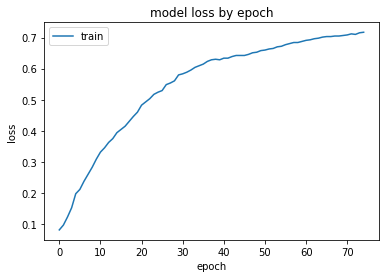

In [245]:
plt.plot(history.history['acc'])
plt.title('model loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [267]:
y_pred = model.predict(x_test)
# mean_squared_error(y_test, y_pred)
y_pred[0]

array([0.87914634, 0.6535248 , 0.6228499 , 0.34233806, 0.65553516,
       0.20047395, 0.3105068 , 0.4184665 ], dtype=float32)

## Logistic Regression

In [229]:
# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train)
# X_test_scaled = standard_scaler.transform(X_test)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
mean_squared_error(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.22395833333333334

In [322]:
def f(n):
    return 1/2**n

In [327]:
i = 1
while True:
    ans = f(i)
    if ans < 0.001:
        print(i)
        break
    else:
        i += 1

10


In [329]:
gallon = 0.0075

In [330]:
40.5-13.5

27.0

In [332]:
r = [28,23,30,25,27]

sorted(r)

[23, 25, 27, 28, 30]

In [333]:
s = [22,19,15,17,20]
sorted(s)

[15, 17, 19, 20, 22]